In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
x = linspace(0,1, 2**10+1)

In [4]:
N = 5
q = linspace(x.min(), x.max(), N)

In [23]:
V = array([product([(x-q[j])/(q[i]-q[j]) for j in range(N) if j != i], axis=0) for i in range(N)])

In [25]:
V.shape

(5, 65)

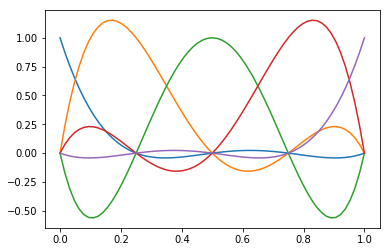

In [24]:
plot(x, V.T)

To understand better, N factorial example:

In [22]:
product(array([range(i, i+4) for i in [3,4,5]]), axis=1)
# try also with axis=0; axis identify the index of the object we are looking at

array([ 360,  840, 1680])

In [33]:
def lagrange_basis(x, q = linspace(x.min(), x.max(), 5)):
    N = len(q)
    V = array([product([(x-q[j])/(q[i]-q[j]) for j in range(N) if j != i], axis=0) for i in range(N)])
    lebesgue = sum(abs(V), axis=0)
    return (V, lebesgue)

In [35]:
V, lebesgue = lagrange_basis(x)

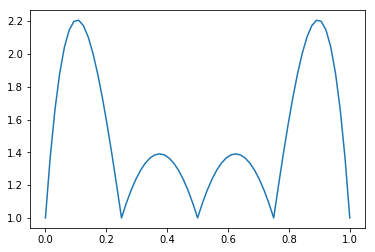

In [36]:
_ = plot(x, lebesgue)

In [37]:
for i in range(5, 30):
    V, l = lagrange_basis(x, linspace(0,1,i))
    print(l.max())

2.20539474487
3.10625250475
4.54780817032
6.91774760139
10.8398131607
17.6972481798
29.8940324826
50.5208722669
85.2746310257
149.48701457
275.054292664
506.416518807
932.433501681
1716.26083344
3157.13043182
5803.19794466
10657.3976121
19552.4543734
35833.1098385
65595.4700707
119935.138697
219019.097777
399449.318149
727557.674143
1323369.60486


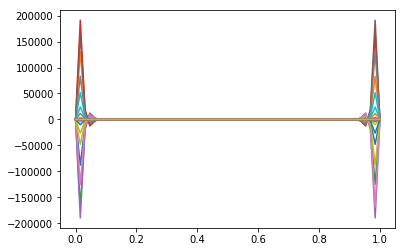

In [38]:
plot(x, V.T)

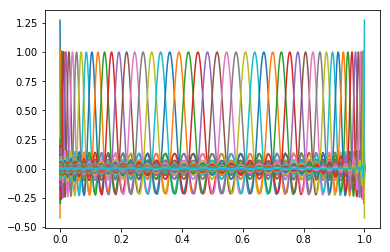

In [61]:
N = 50
theta = arange(N)
def cheby(N):
    return .5*(1-cos(pi*(2*arange(N)+1)/(2*N)))

q = cheby(N)
print()
V,l= lagrange_basis(x,q)

_ = plot(x, V.T)

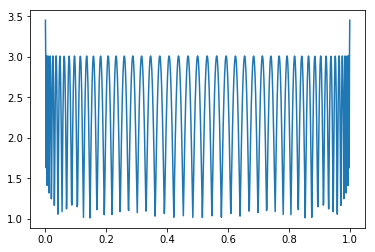

In [62]:
plot(x, l)

In [63]:
for i in arange(5, 500):
    V,l = lagrange_basis(x, cheby(i))
    print(l.max())

1.988854382
2.10439768265
2.20221455521
2.28701606846
2.36185678777
2.42882948238
2.48943037688
2.54476611865
2.59567818079
2.6428212935
2.68671488157
2.72777793642
2.76635333589
2.80272522418
2.83713169974
2.86977425303
2.90082490445
2.93043168361
2.95872289186
2.98581045847
3.01179261235
3.03675603012
3.06077757917
3.08392574385
3.10626180168
3.12784080017
3.14871237367
3.16892143048
3.18850873446
3.20751139966
3.22596331346
3.24389550002
3.261336434
3.27831231244
3.29484729138
3.31096369247
3.32668218414
3.3420219409
3.35700078396
3.37163530558
3.38594097961
3.39993225973
3.41362266722
3.42702486949
3.44015075046
3.45301147386
3.46561754032
3.4779788388
3.49010469325
3.50200390481
3.51368479019
3.52515521658
3.53642263347
3.54749410171
3.55837632008
3.56907564962
3.57959813598
3.5899495299
3.60013530611
3.61016068071
3.6200306272
3.62974989128
3.63932300459
3.64875429737
3.65804791023
3.66720780503
3.67623777508
3.68514145452
3.69392232711
3.70258373444
3.71112888354
3.719560854
3.7

KeyboardInterrupt: 

Multiple dims, alternative to broadcasting

In [70]:
x = linspace(0,1,2**6+1)
y = linspace(0,1,2**7+1)

Nx = 5
Ny = 6

Vx, lx = lagrange_basis(x, cheby(Nx))
Vy, ly = lagrange_basis(y, cheby(Ny))

In [71]:
Vx.shape

(5, 65)

In [72]:
Vy.shape

(6, 129)

In [73]:
V = einsum('ij, kl -> ikjl', Vy, Vx)

In [74]:
X = einsum('i,j -> ij', y,x)

In [75]:
V[0][0].shape

(129, 65)

In [76]:
X.shape

(129, 65)

In [77]:
X, Y = meshgrid(x,y)

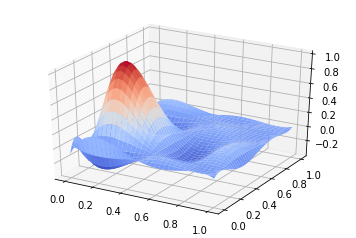

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

#ax.plot_surface(X,Y,V[0][0])
ax.plot_surface(X,Y,V[2][1],cmap=cm.coolwarm)

Look at how V is constructed. f(x) and g(y) are evaluated only once, then the result is broadcasted by ndarrays.

In [85]:
def runge(x,y):
    return 1/(1+10*(x-.5)**2+10*(y-.5)**2)

In [86]:
R = runge(X,Y)

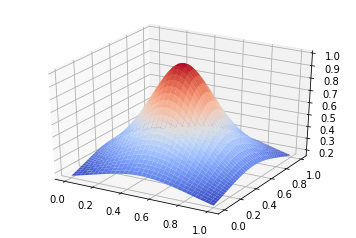

In [87]:
fig = plt.figure()
ax = fig.gca(projection='3d')

#ax.plot_surface(X,Y,V[0][0])
ax.plot_surface(X,Y,R,cmap=cm.coolwarm)

In [88]:
Qx, Qy = meshgrid(cheby(Nx), cheby(Ny))

In [92]:
Rq = runge(Qx, Qy)

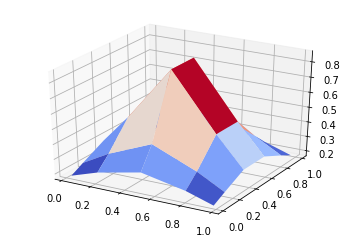

In [93]:
fig = plt.figure()
ax = fig.gca(projection='3d')

#ax.plot_surface(X,Y,V[0][0])
ax.plot_surface(Qx,Qy,Rq,cmap=cm.coolwarm)

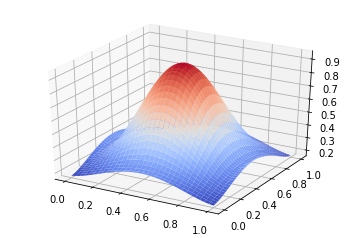

In [94]:
P = einsum('ij, ijkl', Rq, V)


fig = plt.figure()
ax = fig.gca(projection='3d')

#ax.plot_surface(X,Y,V[0][0])
ax.plot_surface(X,Y,P,cmap=cm.coolwarm)